# Modules
This file contains modules that may be used for data manipulation, transformation, and feature engineering.

### Here a modified set by WHH to expand output are compared below the original set

In [5]:
def load_data(filepath):
## load the dataset into dataframe

    import pandas as pd
    houses = pd.read_csv(filepath)
#     print('There are {} samples with {} features: {}.'.format(houses.shape[0], houses.shape[1]-2, houses.columns.values))
    return houses

In [6]:
def split_variable_features(data):
## separate features and saleprice

    y = data['SalePrice']
    X = data.drop('SalePrice',1)
    return (X,y)

In [7]:
def fill_NA(houses):
## Drop the 'Id', 'MiscFeature', 'GarageCars' features
## Drop the one sample with missing 'Electrical' information
## Fill all other NA with 'None' (categorical) or 0 (numerical)

    houses = houses.drop('Id',1)
    # use 'MiscVal' instead
    houses = houses.drop('MiscFeature',1)
    # use 'GarageArea' instead
    houses = houses.drop('GarageCars',1)
    # pool quality
    houses['PoolQC'] = houses['PoolQC'].fillna('None')
    # alley access
    houses['Alley'] = houses['Alley'].fillna('None')
    # fence
    houses['Fence'] = houses['Fence'].fillna('None')
    # fireplace
    houses['FireplaceQu'] = houses['FireplaceQu'].fillna('None')
    # garage
    houses['GarageCond'] = houses['GarageCond'].fillna('None')
    houses['GarageType'] = houses['GarageType'].fillna('None')
    houses['GarageYrBlt'] = houses['GarageYrBlt'].fillna('None')
    houses['GarageFinish'] = houses['GarageFinish'].fillna('None')
    houses['GarageQual'] = houses['GarageQual'].fillna('None')
    # basement, only one house with missing BsmtExposure&BsmtFinType2
    houses['BsmtQual'] = houses['BsmtQual'].fillna('None')
    houses['BsmtCond'] = houses['BsmtCond'].fillna('None')
    houses['BsmtFinType1'] = houses['BsmtFinType1'].fillna('None')
    houses['BsmtFinType2'] = houses['BsmtFinType2'].fillna('None')
    houses['BsmtExposure'] = houses['BsmtExposure'].fillna('None')
    # distance from the connected street, fill NA with average number
    houses['LotFrontage'] = houses['LotFrontage'].fillna(70)
    # masonry veneer 
    houses['MasVnrArea'] = houses['MasVnrArea'].fillna(0)
    houses['MasVnrType'] = houses['MasVnrType'].fillna('None')
    # Remove the sample with missing Electrical informaiton
    idx_naElectrical = houses.loc[houses['Electrical'].isnull()].index
    houses = houses.drop(idx_naElectrical)
#     print('After filling NAs, There are {} samples with {} features: {}.'.format(houses.shape[0], houses.shape[1]-2, houses.columns.values))
    return houses

In [8]:
def redefine_category_numeric(data):
## change some categorical feature into numerical feature to show the quality/condition order and for further feature engineering
## change some numerical feature into categorical feature, 'MSSubClass', 'MoSold', 'YrSold'

#     categorical_features = data.select_dtypes(include = ["object"]).columns
#     numerical_features = data.select_dtypes(exclude = ["object"]).columns
    data = data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"},
                       "YrSold": {2008:'2008', 2007:'2007',2006:'2006',2009:'2009',2010:'2010'}
                      })
    data = data.replace({
#                         "Street" : {"Grvl" : 1, "Pave" : 2},
#                         "Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                        "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                        "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                        "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                        "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
#                         "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                        "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                        "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                        "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                        "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "GarageFinish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                        "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
#                         "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                        "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
#                         "Fence" : {"None" : 0, "MnWw" : 1, "MnPrv" : 1, "GdWo" : 2, "GdPrv" : 2}
                        })
    return data

In [9]:
def add_new_features(houses):
## create new features from combination of existing features
## remove the corresponding features

    houses['Overall'] = houses['OverallQual'] * houses['OverallCond'] * houses['Functional']
    houses['Pool'] = houses['PoolQC'] * houses['PoolArea']
    houses['Exter'] = houses['ExterQual'] * houses['ExterCond']
    houses['Kitchen'] = houses['KitchenAbvGr'] * houses['KitchenQual']
    houses['Garage'] = houses['GarageQual'] * houses['GarageCond'] * houses['GarageFinish'] * houses['GarageArea']
    houses['Fireplace'] = houses['Fireplaces'] * houses['FireplaceQu']
    houses['Basement'] = houses['BsmtQual'] * houses['BsmtCond'] * (houses['BsmtFinType1']*houses['BsmtFinSF1']+houses['BsmtFinType2']*houses['BsmtFinSF2']+houses['BsmtUnfSF'])/houses['TotalBsmtSF']
    houses['Basement'] = houses['Basement'].fillna(0)
    houses['OpenAreaSF'] = houses['WoodDeckSF'] + houses['OpenPorchSF'] + houses['EnclosedPorch'] + houses['3SsnPorch'] + houses['ScreenPorch']
    houses['TotBath'] = houses["BsmtFullBath"] + (0.5 * houses["BsmtHalfBath"]) + houses["FullBath"] + (0.5 * houses["HalfBath"])
    houses['TotSF'] = houses['GrLivArea'] + houses['TotalBsmtSF']
    
    
    houses = houses.drop(['OverallQual','OverallCond','Functional'],1)  
    houses = houses.drop(['PoolQC','PoolArea'],1)    
    houses = houses.drop(['ExterQual','ExterCond'],1)    
    houses = houses.drop(['KitchenAbvGr','KitchenQual'],1)    
    houses = houses.drop(['GarageQual','GarageCond','GarageFinish','GarageArea'],1)    
    houses = houses.drop(['Fireplaces','FireplaceQu'],1)    
    houses = houses.drop(['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2'],1)    
    houses = houses.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],1)
    houses = houses.drop(["BsmtFullBath","BsmtHalfBath",'FullBath','HalfBath'],1)
    
    return houses

In [10]:
def log_transform_skew(data):
## using log-transformation to make the features more like normal distribution (less sknewness)
## better regression result to smooth out some irregularities
    
    import numpy as np
    log_transform_features = ['LotFrontage','LotArea','MasVnrArea','1stFlrSF','2ndFlrSF','GrLivArea',
                              'Exter','Kitchen','Fireplace','Basement','TotSF'];
    data[log_transform_features] = np.log1p(data[log_transform_features])
    data['BsmtUnfSF'] = np.log(data['BsmtUnfSF']+500)
    data['TotalBsmtSF'] = np.log(data['TotalBsmtSF']+1000)
    data['Garage'] = np.log(data['Garage']+500)
    data['Basement'] = np.log(data['Basement']+500)
    data['OpenAreaSF'] = np.log(data['OpenAreaSF']+500)
    data['Overall'] = np.log(data['Overall']+300)
    
    data['YearBuilt'] = data['YearBuilt']/1000
    data['YearRemodAdd'] = data['YearRemodAdd']/1000
    
    data = data.drop(['LowQualFinSF','MiscVal','Pool'],1)
    return data

In [11]:
def standard_scaling_numeric_features(data):
    from sklearn.preprocessing import StandardScaler
    feature = ['LotFrontage','LotArea','1stFlrSF','GrLivArea',
               'Exter','Kitchen','Basement','TotSF','BsmtUnfSF','TotalBsmtSF',
               'Garage','Basement','OpenAreaSF']
    stdSc = StandardScaler()
    data.loc[:, feature] = stdSc.fit_transform(data.loc[:, feature])
    return (data, stdSc, numerical_features)

In [12]:
def robust_scaling_numeric_features(data):
    from sklearn.preprocessing import RobustScaler
    feature = ['LotFrontage','LotArea','1stFlrSF','GrLivArea',
               'Exter','Kitchen','Basement','TotSF','BsmtUnfSF','TotalBsmtSF',
               'Garage','Basement','OpenAreaSF']
    rSc = RobustScaler()
    data.loc[:, feature] = rSc.fit_transform(data.loc[:, feature])
    return (data, rSc, numerical_features)

In [13]:
def encode_category_features(data):
    import pandas as pd
    data = pd.get_dummies(data)
    return data

In [14]:
from sklearn.model_selection import cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.metrics import mean_squared_error, make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better = False)
import numpy as np
def rmse_cv(model):
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
#     cv = 10
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = scorer, cv=cv))
    return rmse

In [15]:
def linear_regression():
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X)
    print("RMSE for Linear Regression: {:0.4f} (+/- {:0.4f})".format(rmse_cv(lr).mean(), rmse_cv(lr).std() * 2))
    return lr

In [16]:
def ridge_regression():
    from sklearn.linear_model import RidgeCV
    model = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
    model.fit(X,y)
    alpha = model.alpha_
    model = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    y_pred = model.predict(X)
    print("RMSE for Ridge Regression with alpha {}: {:0.4f} (+/- {:0.4f})".format(alpha, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    return model

In [17]:
def elastic_regression():
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    ratio = model.l1_ratio_
    model = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    ratio = model.l1_ratio_
    y_pred = model.predict(X)
    print("RMSE for Elastic Regression with alpha {}, ratio {}: {:0.4f} (+/- {:0.4f})".format(alpha, ratio, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    
    return model

In [18]:
def partial_ls_regression():
    from sklearn.cross_decomposition import PLSRegression
    model = PLSRegression(n_components=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    print("RMSE for PLS: {:0.4f} (+/- {:0.4f})".format(rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    return model

In [19]:
def xgboost_model():
    import xgboost as xgb
#     %matplotlib inline
#     import matplotlib.pyplot as plt
#     dtrain = xgb.DMatrix(X_train, label = y_train)
#     params = {"max_depth":2, "eta":0.1}
#     model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
#     model.loc[30:,["train-rmse-mean"]].plot()
    model_xgb = xgb.XGBRegressor(n_estimators=400, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
    model_xgb.fit(X_train, y_train)
    print("RMSE for xgboost: {:0.4f} (+/- {:0.4f})".format(rmse_cv(model_xgb).mean(), rmse_cv(model_xgb).std() * 2))
    return model_xgb

In [20]:
houses = load_data('train.csv')
houses = fill_NA(houses)
houses = redefine_category_numeric(houses)
houses = add_new_features(houses)
X, y = split_variable_features(houses)
X = log_transform_skew(X)
#X, stdSc, numerical_features = standard_scaling_numeric_features(X)
X = encode_category_features(X)
import numpy as np
y = np.log(y)

# MODIFIED BY WHH from here down

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)
# #standard scaling
# X_train, stdSc_X, numerical_features = standard_scaling_numeric_features(X_train)
# X_valid.loc[:,numerical_features] = stdSc_X.transform(X_valid.loc[:,numerical_features])
# #robust scaling
# X_train, rSc_X, numerical_features = robust_scaling_numeric_features(X_train)
# X_valid.loc[:,numerical_features] = rSc_X.transform(X_valid.loc[:,numerical_features])
# X_train = encode_category_features(X_train)
# X_valid = encode_category_features(X_valid)

In [22]:
# lr = linear_regression()
# ridge = ridge_regression()
# lasso = lasso_regression()
# elastic = elastic_regression()
# pls = partial_ls_regression()
# xgboost = xgboost_model()

In [23]:
# ratio = 0.7
# y_pred = ratio*xgboost.predict(X)+(1-ratio)*lasso.predict(X)
# mse = mean_squared_error(y,y_pred)
# print('MSE for {} xgboost+ {:0.1f} lasso: {}'.format(ratio, 1-ratio,mse))

## Data subsets- whh, TODO

# Define expanded_scores module

Note doesn't work for Random Forests, due to no .coef_, instead variable importance

In [24]:
def expanded_scores(model): 
    import pandas as pd
    #get coefficient list
    coef = pd.Series(model.coef_, index = X.columns)

    #get n model params:
    nfeat = sum(coef != 0)

    # get RMSE, nfeat
    var ="RMSE","nfeat"
    dat =rmse_cv(model).mean(), nfeat
    modout =pd.DataFrame([var, dat]).T
    modout.columns=(["param","value"])
    
    # get top coefficients by abs, reorder
    coefdf = pd.DataFrame({"param":X.columns,"value":model.coef_})
    coefdf["coef_a"] = coefdf.value.abs()
    coefasort=coefdf.sort_values('coef_a', ascending = False)
    coefasort=coefasort.drop(["coef_a"],1)
    coef10=coefasort.head(10)
    coef10=coef10.sort_values('value', ascending = False)
    
    # combine all results
    frames = [modout, coef10]
    out = pd.concat(frames, keys = ["scores", "params"])
    return out
    # pd.concat([modout,coef_10])

## Linear5: expanded scores--wonky results, others working fine

In [31]:
# Modified, getting weird results
def linear_regression5():
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    print("RMSE for Linear Regression: {:0.4f} (+/- {:0.4f})".format(rmse_cv(model).mean(), rmse_cv(model).std() * 2))

    out = expanded_scores(model)
    return out

## Ridge5, expanded scores

In [32]:
def ridge_regression5():
    from sklearn.linear_model import RidgeCV
    model = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
    model.fit(X,y)
    alpha = model.alpha_
    model = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    y_pred = model.predict(X)
    print("RMSE for Ridge Regression with alpha {}: {:0.4f} (+/- {:0.4f})".format(alpha, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
   
    out = expanded_scores(model)
    return out

## Lasso5, expanded scores

In [33]:
def lasso_regression5():
    from sklearn.linear_model import LassoCV
    import pandas as pd
    model = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    model = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                    max_iter = 50000,cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    y_pred = model.predict(X)
    print("RMSE for Lasso Regression with alpha {}: {:0.4f} (+/- {:0.4f})".format(alpha, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    
    out = expanded_scores(model)
    return out
    # pd.concat([modout,coef_10])

## Elastic5: expanded scores

In [34]:
def elastic_regression5():
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    ratio = model.l1_ratio_
    model = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    ratio = model.l1_ratio_
    y_pred = model.predict(X)
    print("RMSE for Elastic Regression with alpha {}, ratio {}: {:0.4f} (+/- {:0.4f})".format(alpha, ratio, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    
    out = expanded_scores(model)
    return out

## Random Forest5, expanded scores 

#### can't use expanded scores module, no scores, instead feat. import

adapted from https://www.kaggle.com/dfitzgerald3/randomforestregressor)

In [35]:
def random_forest5():
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import make_scorer, mean_squared_error
    import matplotlib.pyplot as plt
    %matplotlib inline

    scorer = make_scorer(mean_squared_error, False)
    model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
    cv_score = np.sqrt(-cross_val_score(estimator=model, X=X_train, y=y_train, cv=15, scoring = scorer))

    # Fit model with training data
    model.fit(X_train, y_train)

    # Output feature importance coefficients, map them to their feature name, and sort values
    coef = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    coef.head(25).plot(kind='bar')
    plt.title('RF Feat. Importance')
    plt.tight_layout()

    #### ADDED to tutorial
    #get n model params:
    nfeat = sum(coef != 0)
    print("Random Forest selected " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

    # get RMSE, nfeat
    var ="RMSE","nfeat"
    dat =rmse_cv(model).mean(), nfeat
    modout =pd.DataFrame([var, dat]).T
    modout.columns=(["param","value"])
    
    # get top coefficients by abs, reorder
    coefdf = pd.DataFrame({"param":X.columns,"value":model.feature_importances_})
    coefdf["coef_a"] = coefdf.value.abs()
    coefasort=coefdf.sort_values('coef_a', ascending = False)
    coefasort=coefasort.drop(["coef_a"],1)
    coef10=coefasort.head(10)
    coef10=coef10.sort_values('value', ascending = False)
    
    # combine all results
    frames = [modout, coef10]
    out = pd.concat(frames, keys = ["scores", "params"])
    out
    return out
    # pd.concat([modout,coef_1

# Get model results - whh updated

In [37]:
linear = linear_regression5()
linear.columns=(["param","linear"])
linear

RMSE for Linear Regression: 149129569.3334 (+/- 894777415.1633)


param       linear
scores 0                  RMSE   1.4913e+08
       1                 nfeat          337
params 109     BldgType_Duplex  4.63664e+10
       107       BldgType_1Fam  4.60043e+10
       108     BldgType_2fmCon  4.60043e+10
       111     BldgType_TwnhsE  4.60043e+10
       196  GarageType_BuiltIn -5.14151e+10
       198   GarageType_Detchd -5.14151e+10
       194   GarageType_Attchd -5.14151e+10
       195  GarageType_Basment -5.14151e+10
       197  GarageType_CarPort -5.14151e+10
       193   GarageType_2Types -5.14151e+10

In [38]:
ridge=ridge_regression5()
ridge.columns=(["param","ridge"])
ridge

RMSE for Ridge Regression with alpha 6.0: 0.1270 (+/- 0.0174)


param      ridge
scores 0                    RMSE   0.126982
       1                   nfeat        338
params 13                Overall   0.406203
       21                  TotSF   0.191113
       10              GrLivArea   0.163659
       87   Neighborhood_StoneBr   0.129911
       133      RoofMatl_WdShngl   0.120994
       81   Neighborhood_NridgHt   0.117193
       80   Neighborhood_NoRidge  0.0993078
       103       Condition2_PosN  -0.108729
       126      RoofMatl_ClyTile   -0.17958
       37       MSZoning_C (all)  -0.197079

In [39]:
lasso = lasso_regression5()
lasso.columns=(["param","lasso"])
lasso

RMSE for Lasso Regression with alpha 0.00054: 0.1225 (+/- 0.0209)


param      lasso
scores 0                    RMSE   0.122511
       1                   nfeat        101
params 13                Overall   0.576415
       21                  TotSF   0.324376
       10              GrLivArea   0.165767
       87   Neighborhood_StoneBr   0.147336
       81   Neighborhood_NridgHt   0.130769
       80   Neighborhood_NoRidge   0.104155
       86   Neighborhood_Somerst  0.0826086
       72   Neighborhood_Edwards -0.0680396
       37       MSZoning_C (all)  -0.305252
       126      RoofMatl_ClyTile  -0.620726

In [40]:
elastic = elastic_regression5()
elastic.columns=(["param","elastic"])
elastic

RMSE for Elastic Regression with alpha 0.0006, ratio 0.85: 0.1227 (+/- 0.0207)


param    elastic
scores 0                    RMSE   0.122689
       1                   nfeat        106
params 13                Overall   0.571929
       21                  TotSF   0.321492
       10              GrLivArea    0.16533
       87   Neighborhood_StoneBr   0.147551
       81   Neighborhood_NridgHt   0.130861
       80   Neighborhood_NoRidge   0.104876
       86   Neighborhood_Somerst  0.0824509
       103       Condition2_PosN -0.0720276
       37       MSZoning_C (all)  -0.303426
       126      RoofMatl_ClyTile  -0.581977

Random Forest selected 325 variables and eliminated the other 13 variables


param Rand_forest
scores 0           RMSE     0.13702
       1          nfeat         325
params 21         TotSF    0.628307
       13       Overall   0.0943685
       16        Garage   0.0631101
       2      YearBuilt   0.0342327
       20       TotBath   0.0167472
       18      Basement   0.0152445
       10     GrLivArea     0.01296
       3   YearRemodAdd   0.0127904
       1        LotArea  0.00874965
       8       1stFlrSF  0.00735553

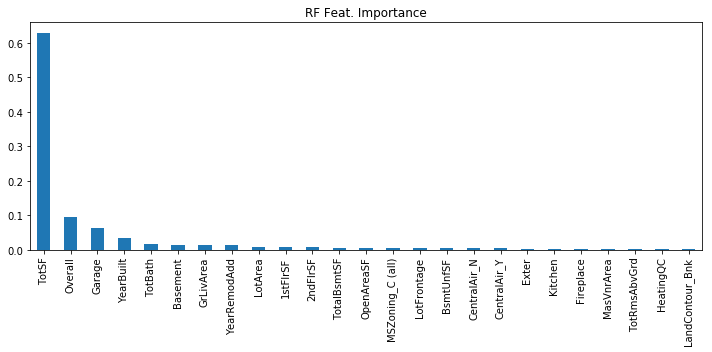

In [41]:
Rand_for = random_forest5()
Rand_for.columns=(["param","Rand_forest"])
Rand_for

## Combine model results - whh, needs work

In [42]:
import pandas as pd
# Merge model outputs
m_comp = pd.merge(ridge, lasso, on='param', how='outer').T
m_comp.fillna(0, inplace=True) 

# Fix colnames
m_comp.columns = m_comp.iloc[0]
m_comp.drop(m_comp.index[0])
# m_comp.drop('param')

m_comp


param,RMSE,nfeat,Overall,TotSF,GrLivArea,Neighborhood_StoneBr,RoofMatl_WdShngl,Neighborhood_NridgHt,Neighborhood_NoRidge,Condition2_PosN,RoofMatl_ClyTile,MSZoning_C (all),Neighborhood_Somerst,Neighborhood_Edwards
param,RMSE,nfeat,Overall,TotSF,GrLivArea,Neighborhood_StoneBr,RoofMatl_WdShngl,Neighborhood_NridgHt,Neighborhood_NoRidge,Condition2_PosN,RoofMatl_ClyTile,MSZoning_C (all),Neighborhood_Somerst,Neighborhood_Edwards
ridge,0.126982,338,0.406203,0.191113,0.163659,0.129911,0.120994,0.117193,0.0993078,-0.108729,-0.17958,-0.197079,0,0
lasso,0.122511,101,0.576415,0.324376,0.165767,0.147336,0,0.130769,0.104155,0,-0.620726,-0.305252,0.0826086,-0.0680396


## PLOT combined model results -  whh, TODO

Make 3 box heatmap with values: 1) RMSE; 2) n vars; 3) top features (merged, cut down as needed)
Best, different color scales for each